## Python 5

This week is all about practicing the techniques that we've seen so far, in the context of exploring a seismic dataset. There are two files you should work with, both "data cubes" representing the travel time taken by a seismic wave through a volume. 

Load the first dataset:

In [1]:
import scipy.io as io 

datafile = io.loadmat('homogeneous_data.mat')
data = datafile['homogeneous_data']

1. What shape is the data object?

In [2]:
data.shape

(167, 167, 167)

The data is stored in a cubic structure, each data point representing the travel time on the x,y,z physical grid where x,y,z all begin at 0m and increment by 24m. 
For example, the (0,1,2) value represents the travel time sampled at location (0m,24m,48m).

2. Find the travel time at the location (2952m, 1272m, 2304m), which should be displayed to the screen to 2 decimal places.


In [3]:
import numpy as np
x = np.array([2952,1272, 2304])/24
print('The index is ', x)
print('The corresponding travel time is {0:.2f}  seconds'.format(data[123,53,96]))

The index is  [123.  53.  96.]
The corresponding travel time is 0.85  seconds


3. You are interested in the 1D profile in z when x = 504m and y = 3096m.  Extract the 1D profile and plot it against distance.

In [4]:
print('The indices are ', 504/24, 3096/24)

The indices are  21.0 129.0


Text(0.5, 1.0, 'Travel time vs distance in z-profile when x=504m, y = 3096m')

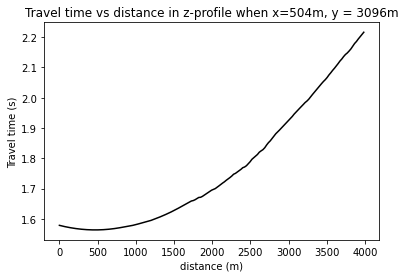

In [5]:
import matplotlib.pylab as plt

plt.figure()
plt.plot( np.linspace(0,166 * 24, 167), data[21,129,:], "-k")
plt.xlabel('distance (m)')
plt.ylabel('Travel time (s)')
plt.title('Travel time vs distance in z-profile when x=504m, y = 3096m')

4A. The notes accompanying the data file have been lost, and there is no record of where the seismic source was located. 

    1. By modifying the Matrix-visualisation command below, make an image of a 2D-slice through the dataset at z=0m of the travel-times. Using the help function, fix the range of values shown to be between 0 and 2. Explore how the image changes if you use different colormaps such as 'jet' or 'viridis': use the help function, or the webpage https://matplotlib.org/stable/tutorials/colors/colormaps.html
    2. Where is the lowest travel time in this slice, and what is its approximate value?
    3. By altering by hand the value of z, find the approximate location of the lowest travel time, and thus the seismic source.


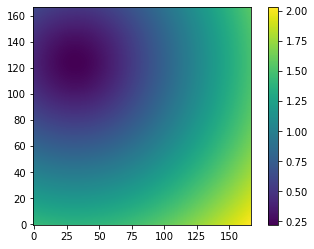

In [28]:
plt.imshow(data[:,:,0],origin='lower')
plt.colorbar()

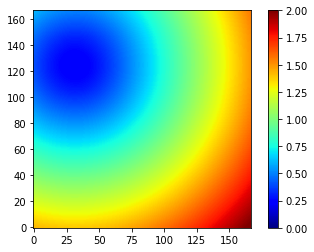

In [36]:
plt.imshow(data[:,:,0],origin='lower', vmin = 0, vmax = 2, cmap = 'jet')
plt.colorbar()

4B. An alternative visualisation technique is to plot a contour map of the travel times through a slice (in which the height represents the travel time).
By modifying the code below, plot a contour map at your preferred depth.

X = # these are the x-values
Y = # these are the x-values
Z = # this is the data to be contoured
plt.figure( figsize = (6,6) )
plt.contourf( X, Y, Z, cmap = 'jet')
plt.tight_layout()

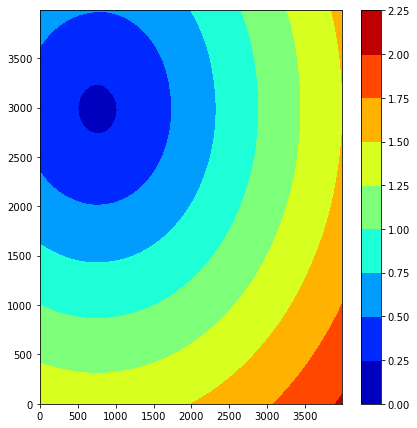

In [22]:
X = np.arange(0, 167*24,24)
Y = np.arange(0, 167*24,24)
Z = data[:,:,0]
plt.figure( figsize = (6,6) )
plt.contourf( X, Y, Z, cmap = 'jet')
plt.tight_layout()
plt.colorbar()


In [17]:
total = 0
for i in range(167):
    for j in range(167):
        for k in range(167):
            if data[i,j,k] < 0.02:
                print('Data: {0:.6f}s at position x = {1:d}m, y = {2:d}m, z = {3:d}m'.format(data[i,j,k], 24 * i, 24 * j, 24 * k))
                total += 1
print('Total number of points below threshold is ', total)

Data: 0.017663s at position x = 2952m, y = 744m, z = 480m
Data: 0.018690s at position x = 2952m, y = 768m, z = 480m
Data: 0.011633s at position x = 2976m, y = 720m, z = 480m
Data: 0.009766s at position x = 2976m, y = 720m, z = 504m
Data: 0.015758s at position x = 2976m, y = 720m, z = 528m
Data: 0.018716s at position x = 2976m, y = 720m, z = 552m
Data: 0.014838s at position x = 2976m, y = 744m, z = 456m
Data: 0.013701s at position x = 2976m, y = 744m, z = 480m
Data: 0.010713s at position x = 2976m, y = 744m, z = 504m
Data: 0.012401s at position x = 2976m, y = 744m, z = 528m
Data: 0.018580s at position x = 2976m, y = 744m, z = 552m
Data: 0.016458s at position x = 2976m, y = 768m, z = 456m
Data: 0.007756s at position x = 2976m, y = 768m, z = 480m
Data: 0.019025s at position x = 2976m, y = 768m, z = 504m
Data: 0.018883s at position x = 2976m, y = 768m, z = 552m
Data: 0.016549s at position x = 2976m, y = 792m, z = 456m
Data: 0.017963s at position x = 2976m, y = 792m, z = 480m
Data: 0.019808

6. Now reduce the threshold to 0.01 seconds. How many travel times do you list now?
Keep reducing the threshold by hand until you find that only one data point has a travel time less than this value.  This is our closest point to the seismic source.


In [18]:
total = 0
for i in range(167):
    for j in range(167):
        for k in range(167):
            if data[i,j,k] < 0.005:
                print('Data: {0:.6f}s at position x = {1:d}m, y = {2:d}m, z = {3:d}m'.format(data[i,j,k], 24 * i, 24 * j, 24 * k))
                total += 1
print('Total number of points below threshold is ', total)

Data: 0.003313s at position x = 3000m, y = 744m, z = 504m
Total number of points below threshold is  1


7. Load the file ‘heterogeneous_data.mat’ as before. This represents travel times but in a heterogeneous media.
Using the command np.argmin, find the indices corresponding to the minimum travel time. Note that by default this will return the index corresponding to a flattened array.
You'll need to use the command np.unravel_index  to convert the index of the flattened array into the (i,j,k) indices you need. Use the help function to look up how this works.

Using the homogeneous data set, check that you get the same answer using this method as for using the for loops of question 6.

In [19]:
datafile = io.loadmat('heterogeneous_data.mat')
data2 = datafile['heterogeneous_data']

index = data2.argmin()
print('Indices for seismic source in heterogeneous data set: ',np.unravel_index(index, shape=(167,167,167))) 

index = data.argmin()
print('Indices for seismic source in homogenous data set: ',np.unravel_index(index, shape=(167,167,167))) 
print('Positions for seismic source in homogenous data set: ' , np.array(np.unravel_index(index, shape=(167,167,167)) )*24)  #same answer as before!

Indices for seismic source in heterogeneous data set:  (21, 31, 125)
Indices for seismic source in homogenous data set:  (125, 31, 21)
Positions for seismic source in homogenous data set:  [3000  744  504]


8. Define a 1D profile of data points in the x-direction (either increasing or decreasing) through your seismic sources in your two data files. Plot these two profiles on the same figure as a function of distance in different colours. Include a legend.

Text(0.5, 1.0, 'Travel time vs distance in x-profile through the seismic source')

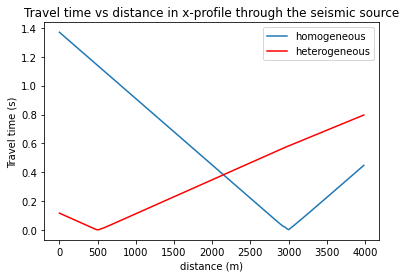

In [20]:
plt.figure()
homogeneous_profile = data[:,31,21]
distance_of_homogeneous_profile = 24 * np.arange(0, len(homogeneous_profile))
heterogeneous_profile = data2[:,31,125]
distance_of_heterogeneous_profile = 24 * np.arange(0, len(heterogeneous_profile))

plt.plot( distance_of_homogeneous_profile, homogeneous_profile,label='homogeneous')
plt.plot( distance_of_heterogeneous_profile, heterogeneous_profile,color='red', label='heterogeneous' )

plt.xlabel('distance (m)')
plt.ylabel('Travel time (s)')
plt.legend()
plt.title('Travel time vs distance in x-profile through the seismic source')

9. A client would like you to create a 2D slice (in the x and y plane) of the homogeneous dataset at z=0m, down-sampled in each direction by a factor of 2.  
Write this 2D dataset to disk using the command np.savetxt (look up how this works).


In [29]:
np.savetxt('test.out', data[::2,::2,0])
